In [1]:
#Copying images to training, validation, and test directories
import os, shutil
import numpy as np

#Path where my dataset is stored
base_dir = '/home/rauly/Desktop/IA/Thermal_faces2/'
#os.mkdir(base_dir)

# Directories for the training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [15]:
#Here is the proposed model.

from keras import layers
from keras import models
from keras import regularizers
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(54, (3, 3), activation='relu',
                        input_shape=(72, 96, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(145, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 70, 94, 54)        540       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 47, 54)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 35, 47, 54)        216       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 45, 100)       48700     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 22, 100)       0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 22, 100)       400       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 20, 145)       130645    
__________

In [16]:
#Compilation stage
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), #Decrease learning rate
              metrics=['accuracy'])

In [17]:
#Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,# Target directory
        target_size=(72, 96), # All images are resized from 240x320 to 72x96
        batch_size= 5, #20
        color_mode='grayscale',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='grayscale',
        class_mode='categorical')

Found 250 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [18]:
#Training and validation stages
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50, 
      epochs= 12,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/12
50/50 [==============================] - 26s 514ms/step - loss: 0.4944 - acc: 0.8520 - val_loss: 0.6063 - val_acc: 0.8000
Epoch 2/12
50/50 [==============================] - 24s 488ms/step - loss: 0.0412 - acc: 0.9960 - val_loss: 0.4092 - val_acc: 0.8800
Epoch 3/12
50/50 [==============================] - 24s 487ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.4028 - val_acc: 0.8200
Epoch 4/12
12/50 [======>.......................] - ETA: 16s - loss: 9.0942e-04 - acc: 1.0000

KeyboardInterrupt: 

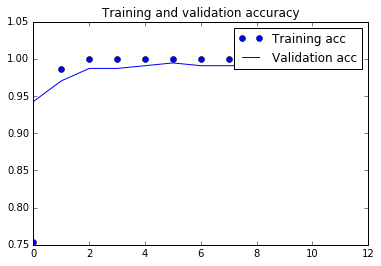

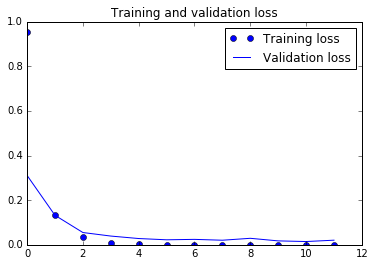

In [98]:
#Plot of the loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
#The proposed model is defined again
from keras import layers
from keras import models
from keras import regularizers
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(54, (3, 3), activation='relu',
                        input_shape=(72, 96, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(145, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 70, 94, 54)        540       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 47, 54)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 35, 47, 54)        216       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 33, 45, 100)       48700     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 22, 100)       0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 16, 22, 100)       400       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 20, 145)       130645    
__________

In [20]:
#Compilation stage
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), #Decrease learning rate
              metrics=['accuracy'])

In [21]:
#Retraining from scratch
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs= 2)

Epoch 1/2
50/50 [==============================] - 22s 443ms/step - loss: 0.6273 - acc: 0.8040
Epoch 2/2
50/50 [==============================] - 22s 443ms/step - loss: 0.0346 - acc: 0.9960


In [104]:
# The model is saved
model.save('cnn_propuesta_experimento1_2.h5')

In [22]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='grayscale',
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=100)

Found 100 images belonging to 5 classes.


In [23]:
#Rank-1 recognition rate
print('test acc:', test_acc)

test acc: 0.91


In [22]:
train_generator.class_indices

{'person0': 0,
 'person1': 1,
 'person10': 2,
 'person11': 3,
 'person12': 4,
 'person13': 5,
 'person14': 6,
 'person2': 7,
 'person3': 8,
 'person4': 9,
 'person5': 10,
 'person6': 11,
 'person7': 12,
 'person8': 13,
 'person9': 14}

In [26]:
train_generator.classes[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [29]:
train_generator.filenames

['person0/person0_0.jpg',
 'person0/person0_1.jpg',
 'person0/person0_10.jpg',
 'person0/person0_11.jpg',
 'person0/person0_12.jpg',
 'person0/person0_13.jpg',
 'person0/person0_14.jpg',
 'person0/person0_15.jpg',
 'person0/person0_16.jpg',
 'person0/person0_17.jpg',
 'person0/person0_18.jpg',
 'person0/person0_19.jpg',
 'person0/person0_2.jpg',
 'person0/person0_20.jpg',
 'person0/person0_21.jpg',
 'person0/person0_22.jpg',
 'person0/person0_23.jpg',
 'person0/person0_24.jpg',
 'person0/person0_25.jpg',
 'person0/person0_26.jpg',
 'person0/person0_27.jpg',
 'person0/person0_28.jpg',
 'person0/person0_29.jpg',
 'person0/person0_3.jpg',
 'person0/person0_4.jpg',
 'person0/person0_5.jpg',
 'person0/person0_6.jpg',
 'person0/person0_7.jpg',
 'person0/person0_8.jpg',
 'person0/person0_9.jpg',
 'person1/person1_0.jpg',
 'person1/person1_1.jpg',
 'person1/person1_10.jpg',
 'person1/person1_11.jpg',
 'person1/person1_12.jpg',
 'person1/person1_13.jpg',
 'person1/person1_14.jpg',
 'person1/per